# COVID-19 CASES in PA #
Data Source: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

In [4]:
# Web Scraped Data from PA Department of Health
df = pd.read_csv("pa_summary.csv")
df.head(5)

,Date,Negative,Positive,Deaths
0,2020-04-01,37645,4843,63
1,2020-03-30,33777,4087,48
2,2020-03-29,30061,3394,38
3,2020-03-28,25254,2751,34
4,2020-03-27,21016,2218,22


### Assume Sum of Positive and Negative as Total Tested Population

In [11]:
# Sum of Positive and Negative as Total Tested Population
df['Tested'] = df['Positive'] + df['Negative']
df['Positive_Percent'] = 100*df['Positive']/df['Tested']
df['Negative_Percent'] = 100*df['Negative']/ df['Tested']
df['Death_Percent'] = 100*df['Deaths']/ df['Tested']
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-03-18,1187,133,0,1320,10.075758,89.924242,0.000000
1,2020-03-19,1608,185,0,1793,10.317903,89.682097,0.000000
2,2020-03-20,2574,268,0,2842,9.429979,90.570021,0.000000
3,2020-03-21,3766,371,2,4137,8.967851,91.032149,0.048344
4,2020-03-22,4964,479,2,5443,8.800294,91.199706,0.036744


In [12]:
df = df.sort_values('Date', ascending = True).reset_index(drop=True)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-03-18,1187,133,0,1320,10.075758,89.924242,0.000000
1,2020-03-19,1608,185,0,1793,10.317903,89.682097,0.000000
2,2020-03-20,2574,268,0,2842,9.429979,90.570021,0.000000
3,2020-03-21,3766,371,2,4137,8.967851,91.032149,0.048344
4,2020-03-22,4964,479,2,5443,8.800294,91.199706,0.036744


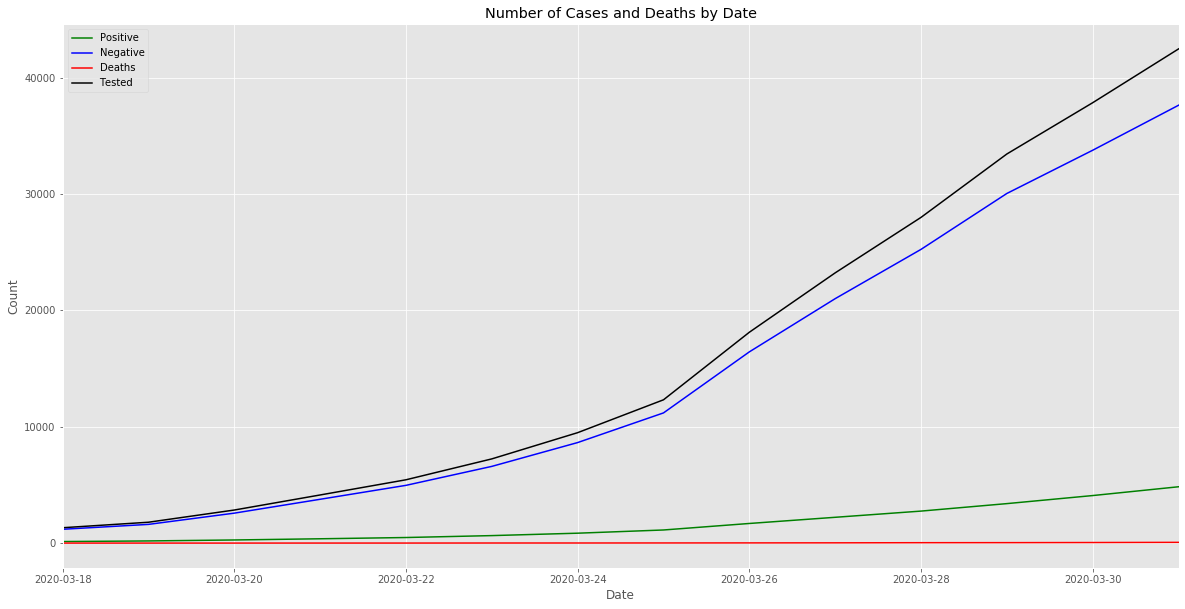

In [41]:
style.use('ggplot')
ax = plt.gca()
df.plot(kind='line',x='Date',y='Positive', color='green', ax=ax, figsize=(20,10))
df.plot(kind='line',x='Date',y='Negative', color='blue', ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Tested', color='black', ax=ax)
plt.title('Number of Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [40]:
df_percent = pd.DataFrame(df, columns=['Date', 'Positive_Percent','Negative_Percent'])
df_percent.set_index("Date", inplace = True) 
df_percent.head(5)

,Positive_Percent,Negative_Percent
Date,,
2020-03-18,10.075758,89.924242
2020-03-19,10.317903,89.682097
2020-03-20,9.429979,90.570021
2020-03-21,8.967851,91.032149
2020-03-22,8.800294,91.199706


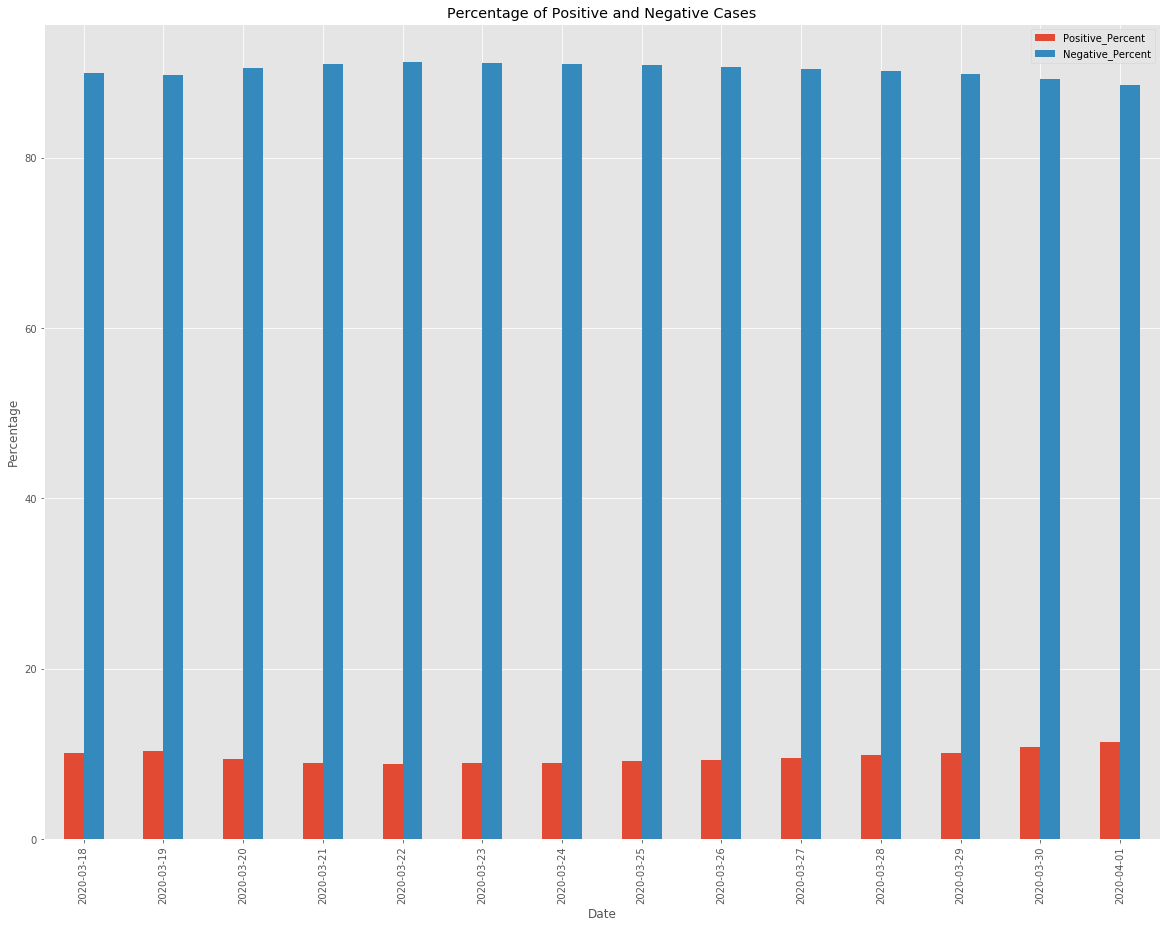

In [39]:
style.use('ggplot')
df_percent.plot.bar(stacked=False, figsize=(20,15), title="Percentage of Positive and Negative Cases")
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()